<a href="https://colab.research.google.com/github/19PA1A0534/07-03-2020/blob/master/Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes Classifier

It is a classification technique.

used for classification algorithms.

Also called idiot bayes classifier.

*Naive Bayes are mostly used in natural language processing (NLP) problems.*

1.Naive Bayes is a classification algorithm of Machine Learning based on Bayes theorem which gives the likelihood of occurrence of the event.

2.Naive Bayes classifier is a probabilistic classifier which means that given an input, it predicts the probability of the input being classified for all the classes.

3.It is also called conditional probability

# Two important assumptions made for Naive Bayes Classifier:

*First is that the attributes are independent of each other and does not affect each others performance, this is the reason it is called 'naive'.

*Second is that all the features are given equal importance. For example if there are 10 features, knowing only 5 features will not give us accurate outcome. All features are necessary to predict outcome and are given equal importance.





#Types of naive bayes:

There are three types of naive bayes classifiers:

1.Multinomial Naive Bayes - Widely used classifier for document classification which keeps the count of frequent words present in the documents.

2.Bernoulli Naive Bayes - Used for discrete data, where features are only in binary form.

3.Gaussian Naive Bayes - Used when we are dealing with continuous data and uses Gaussian distribution..

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
a=pd.read_csv('Iris.csv')
a.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
a.shape

(150, 6)

In [ ]:
len(a)

150

In [ ]:
a.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
a.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
type(a)

pandas.core.frame.DataFrame

In [ ]:
a.ndim

2

In [ ]:
a.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
a.describe(include="all")

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-versicolor
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
a.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [ ]:
a.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

#Guassian Naive Bayes Classifier

1.In Gaussian Naive Bayes, continuous values associated with each feature are assumed to be distributed according to a Gaussian distribution.

2.Gaussian distribution is also called Normal distribution. 


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error

In [ ]:
x=a[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=a['Species']

In [ ]:
a['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predict=model.predict(x_test)
predict

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype='<U15')

In [ ]:
len(predict)

30

In [ ]:
model.predict([[1,2,3,4]]) #outside of data(not in x_test) 

array(['Iris-virginica'], dtype='<U15')

In [ ]:
z=pd.DataFrame({"predicted":predict,"actual":y_test})
z.head()

,predicted,actual
65,Iris-versicolor,Iris-versicolor
143,Iris-virginica,Iris-virginica
120,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa
66,Iris-versicolor,Iris-versicolor


In [ ]:
len(z)

30

In [ ]:
accuracy_score(y_test,predict)*100

96.66666666666667

In [ ]:
classification_report(y_test,predict)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        13\nIris-versicolor       0.89      1.00      0.94         8\n Iris-virginica       1.00      0.89      0.94         9\n\n       accuracy                           0.97        30\n      macro avg       0.96      0.96      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n'

In [ ]:
confusion_matrix(y_test,predict)

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  8]])

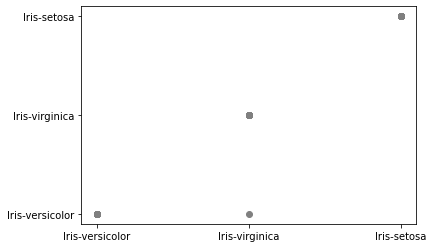

In [103]:
plt.scatter(y_test,predict,color="grey")
plt.show()

#Multinomial Naive Bayes Classifier

1.Multinomial Naive Bayes is a specialized version of Naive Bayes that is designed more for text documents.


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1=MultinomialNB()

In [ ]:
model1.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_pred=model1.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype='<U15')

In [ ]:
model1.predict([[1,2,3,4]])

array(['Iris-virginica'], dtype='<U15')

In [ ]:
len(y_pred)

30

In [ ]:
accuracy_score(y_pred,y_test)*100

96.66666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  8]])

In [ ]:
classification_report(y_test,y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        13\nIris-versicolor       0.89      1.00      0.94         8\n Iris-virginica       1.00      0.89      0.94         9\n\n       accuracy                           0.97        30\n      macro avg       0.96      0.96      0.96        30\n   weighted avg       0.97      0.97      0.97        30\n'

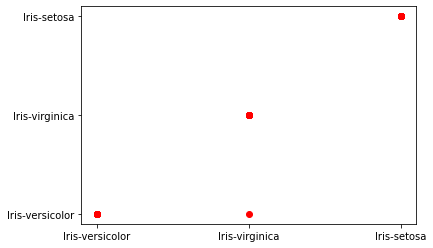

In [104]:
plt.scatter(y_test[:],y_pred[:],color="red")
plt.show()

#Bernoulii Naive Bayes Classifier

1.This is used for discrete data and it works on Bernoulli distribution. 

2.The main feature of Bernoulli Naive Bayes is that it accepts features only as binary values like true or false, yes or no, success or failure, 0 or 1 and so on

3.So when the feature values are binary we know that we have to use Bernoulli Naive Bayes classifier.

In [79]:
from sklearn.naive_bayes import BernoulliNB

In [80]:
modelb=BernoulliNB()
modelb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [83]:
pred=modelb.predict(x_test)
pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype='<U15')

In [84]:
len(pred)

30

In [89]:
modelb.predict([[7.4,1.2,6,4]])

array(['Iris-versicolor'], dtype='<U15')

In [91]:
accuracy_score(y_test,pred)*100 #worst accuracy score because it has three features

26.666666666666668

In [92]:
classification_report(y_test,pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'                 precision    recall  f1-score   support\n\n    Iris-setosa       0.00      0.00      0.00        13\nIris-versicolor       0.27      1.00      0.42         8\n Iris-virginica       0.00      0.00      0.00         9\n\n       accuracy                           0.27        30\n      macro avg       0.09      0.33      0.14        30\n   weighted avg       0.07      0.27      0.11        30\n'

In [93]:
confusion_matrix(y_test,pred)

array([[ 0, 13,  0],
       [ 0,  8,  0],
       [ 0,  9,  0]])

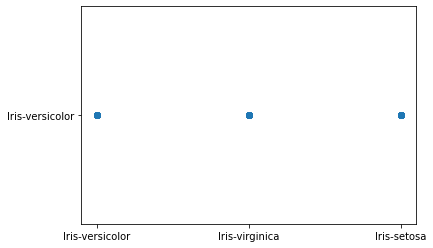

In [99]:
plt.scatter(y_test,pred)
plt.show()

Here in this case there are three features so it has less accuracy score.

It works fine for two features.